<a href="https://colab.research.google.com/github/chandra-sekar-1983/data_visualization/blob/master/Data_Visualization%26Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***1) Import dataset***

***2) Data Understanding***

a) identify dependent and indpendent variable

b) Split features based on datatypes - Numeric ,discrete, categorical  , time variables

c) Understand cardinality of data

***3)Data correctness***

a) Are there any outliers?

b) Do you see missing values?


***4)Ask Questions***

1) What is the general trend of salary?Is it increasing or decreasing or remaining constant?



## ***1) Import Dataset ***


In [4]:
#### salary data is avaialable in 2020 folder

### Importing data
data_file="/content/salary_data.csv"                ### modify here
data=pd.read_csv(data_file)
print(data.shape)
data.head()


(167274, 27)


,Index,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132,NaN,greencard,NaN,91440.0,assistant professor,2
2,3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


**** 2) Data Understanding ***

*** 2 a) Set Independent and Dependent variables ***

In [5]:
### Set independent variable and dependent variable
dependent_var="PAID_WAGE_PER_YEAR"                                             ### modify here
independent_var=data.drop(dependent_var,axis=1).columns.to_list()
print(f" The dependent feature is {dependent_var}")
print(f" Number of  Independent features are {len(independent_var)} and  {independent_var}")

 The dependent feature is PAID_WAGE_PER_YEAR
 Number of  Independent features are 26 and  ['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order']


**2 b) Split numerical ,discrete, categorical and time features***



In [0]:
## Use this code to extract variables  ######## modify here

##[("feature name is -",var,data[var].nunique(), data[var].unique(),print()) for var in independent_var  ]   #### use this code to identify categorical,discrete,numer quickly

In [7]:


## splitting categorical and numerical variable

categorical_var=[var for var in data.columns if data[var].dtypes=='object']
categorical_var=[]
numerical_var=[var for var in data.columns if data[var].dtypes ==('float64' or 'int64')]
time_var=[var for var in data.columns if data[var].dtypes=='datetime64']  


time_var=["CASE_RECEIVED_DATE","DECISION_DATE"]
numerical_var=["CASE_NUMBER","CASE_STATUS","EMPLOYER_NAME","EXPERIENCE_REQUIRED_NUM_MONTHS","Index",
               "PREVAILING_WAGE_SUBMITTED","PAID_WAGE_SUBMITTED","PAID_WAGE_PER_YEAR","order"]

discrete_var=[]

categorical_var=["PREVAILING_WAGE_SUBMITTED_UNIT","PAID_WAGE_SUBMITTED_UNIT","JOB_TITLE","WORK_CITY","EDUCATION_LEVEL_REQUIRED","COLLEGE_MAJOR_REQUIRED",
                 "EXPERIENCE_REQUIRED_Y_N","COUNTRY_OF_CITIZENSHIP","PREVAILING_WAGE_SOC_CODE","PREVAILING_WAGE_SOC_TITLE","WORK_STATE","WORK_POSTAL_CODE",
                 "FULL_TIME_POSITION_Y_N","VISA_CLASS","PREVAILING_WAGE_PER_YEAR","JOB_TITLE_SUBGROUP",]

print("Number of Categorical variables :",len(categorical_var))
print("Categorical variables :",categorical_var)
print()
print("Number of Numerical variables :",len(numerical_var))
print("Numerical variables :",numerical_var)
print()
print("Time variables : ",len(time_var))
print("Time variables :",time_var)

print()
print("Number of Discrete variables :",len(discrete_var))
print("Discrete variables :",discrete_var)


Number of Categorical variables : 16
Categorical variables : ['PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP']

Number of Numerical variables : 9
Numerical variables : ['CASE_NUMBER', 'CASE_STATUS', 'EMPLOYER_NAME', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'Index', 'PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_PER_YEAR', 'order']

Time variables :  2
Time variables : ['CASE_RECEIVED_DATE', 'DECISION_DATE']

Number of Discrete variables : 0
Discrete variables : []


In [8]:
### verifiying if there are any columns appearing in both split

print("Checking if there are duplicate columns or not")

### verifiying if there are any columns appearing in both split

print([var for var in numerical_var if var in (categorical_var or discrete_var or time_var) ])
print([var for var in discrete_var if var in (categorical_var or numerical_var or time_var) ])
print([var for var in categorical_var if var in ( discrete_var or numerical_var or time_var) ])
print([var for var in time_var if var in ( discrete_var or numerical_var or catgorical_var) ])

Checking if there are duplicate columns or not
[]
[]
[]
[]


*** 2 C) Data cardinality - Understanding subcategories categorical data is taking***

In [9]:
[(var,data[var].nunique()) for var in ( categorical_var or discret_var) ]

[('PREVAILING_WAGE_SUBMITTED_UNIT', 5),
 ('PAID_WAGE_SUBMITTED_UNIT', 5),
 ('JOB_TITLE', 12589),
 ('WORK_CITY', 4888),
 ('EDUCATION_LEVEL_REQUIRED', 7),
 ('COLLEGE_MAJOR_REQUIRED', 3261),
 ('EXPERIENCE_REQUIRED_Y_N', 2),
 ('COUNTRY_OF_CITIZENSHIP', 134),
 ('PREVAILING_WAGE_SOC_CODE', 402),
 ('PREVAILING_WAGE_SOC_TITLE', 561),
 ('WORK_STATE', 110),
 ('WORK_POSTAL_CODE', 4866),
 ('FULL_TIME_POSITION_Y_N', 2),
 ('VISA_CLASS', 5),
 ('PREVAILING_WAGE_PER_YEAR', 15315),
 ('JOB_TITLE_SUBGROUP', 8)]

***3) Data Correctness***

***3 a) Identify Missing Values ***

Missing values : True

Number of rows that contain missing element  911840
Percentage of Dataset that contains missing element is 5.45 %

The missing value columns are 
[('WORK_CITY', 3), ('EDUCATION_LEVEL_REQUIRED', 156181), ('COLLEGE_MAJOR_REQUIRED', 156223), ('EXPERIENCE_REQUIRED_Y_N', 156181), ('EXPERIENCE_REQUIRED_NUM_MONTHS', 162309), ('COUNTRY_OF_CITIZENSHIP', 156181), ('WORK_POSTAL_CODE', 113601), ('FULL_TIME_POSITION_Y_N', 11093), ('PREVAILING_WAGE_PER_YEAR', 68)]


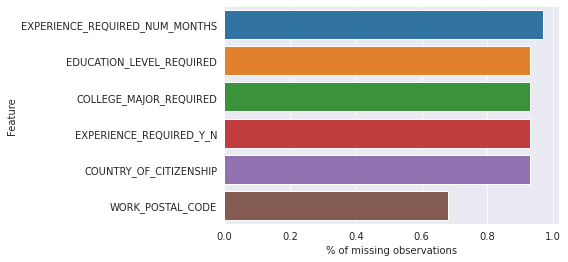

In [10]:
### Finding if the data set contains missing elements are not.True indicates presence of missing elements

print("Missing values :",data.isnull().values.any())

print()
### Finding total number of rows that contains missing elements
print("Number of rows that contain missing element ",data.isnull().sum().sum())
print(f"Percentage of Dataset that contains missing element is {round(data.isnull().sum().sum()/len(data),2)} %")

print()
# make a list of the variables that contain missing values
missing_val_columns=[(col,data[col].isnull().sum()) for col in data.columns if data[col].isnull().sum()>0]
print("The missing value columns are ")
print(missing_val_columns)

### Calculating Percentage of missing observation with respect to full dataset

missing_val_columns=pd.DataFrame(missing_val_columns)
missing_val_columns[1]=round(missing_val_columns[1]/len(data),2)

missing_val_columns=missing_val_columns.rename(columns={0:"Feature",1:"% of missing observations"}).reset_index()
missing_val_columns=missing_val_columns[missing_val_columns["% of missing observations"]>0.1]
missing_val_columns=missing_val_columns.sort_values(by='% of missing observations', ascending=False)



### Visualizing the distribution of missing features

ax = sns.barplot(x="% of missing observations",y="Feature", data=missing_val_columns,orient = 'h')


Insight for Missing Values :Our dataset contains a few variables with missing values. We need to account for this in our Feature engineering /preprocessing step.

*** 3 b)Outliers -  Extreme values may affect the performance of a linear model. Let's find out if we have any in our variables***

Median value : 78600.0


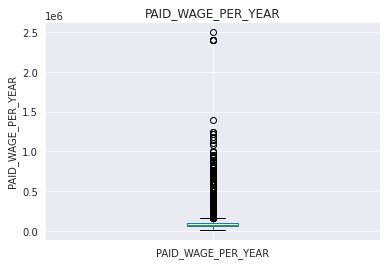

Median value : 78600.0


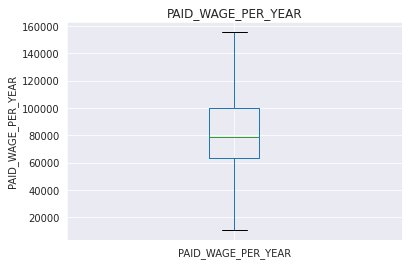

In [11]:
# let's make boxplots to visualise outliers in the continuous variables


def find_outliers(df, var):
    
    df.boxplot(column=var)
    
    print("Median value :",df[var].median())
    plt.title(var)
    plt.ylabel(var)
    plt.show()



## function to treat outliers:
def outlier_treatment(df,col):
     sorted(df[col])
     Q1,Q3 = np.percentile(df[col] , [25,75])
     IQR = Q3 - Q1
     lower_range = Q1 - (1.5 * IQR)
     upper_range = Q3 + (1.5 * IQR)
     quantile_10_value=df[col].quantile(0.10)
     quantile_90_value=df[col].quantile(0.90)
     df[col] = np.where(df[col] < lower_range, quantile_10_value,df[col])
     df[col] = np.where(df[col] >upper_range,quantile_90_value,df[col])

find_outliers(data,"PAID_WAGE_PER_YEAR")
outlier_treatment(data,"PAID_WAGE_PER_YEAR")
find_outliers(data,"PAID_WAGE_PER_YEAR")

**Function to extract Year,Month,Date from  Independent Features**

In [0]:
### function extracts year and month
import datetime

def get_year_month_date(data,col):
  data[col] = pd.to_datetime(data[col] ) 
  data[col+"_Yr"]=data[col].dt.year
  data[col+"_Month"]=data[col].dt.month
  data[col+"_Day"]=data[col].dt.day
  data[col+"_Quarter"]=data["CASE_RECEIVED_DATE"].dt.quarter

get_year_month_date(data,"CASE_RECEIVED_DATE")
get_year_month_date(data,"DECISION_DATE")

***4 1) General Trend of salary ***

Text(0.5, 1.0, 'Distribution of Income')

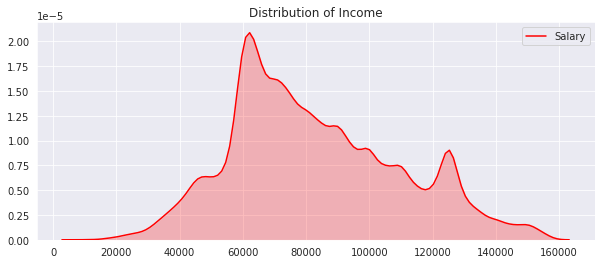

In [19]:
### distribution of salary

fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(data[dependent_var] , color='r',shade=True,label='Salary')
#ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Distribution of Income')

***Insight : Most of the professionals are making between 60K-100K***

Distribution of  PAID_WAGE_PER_YEAR


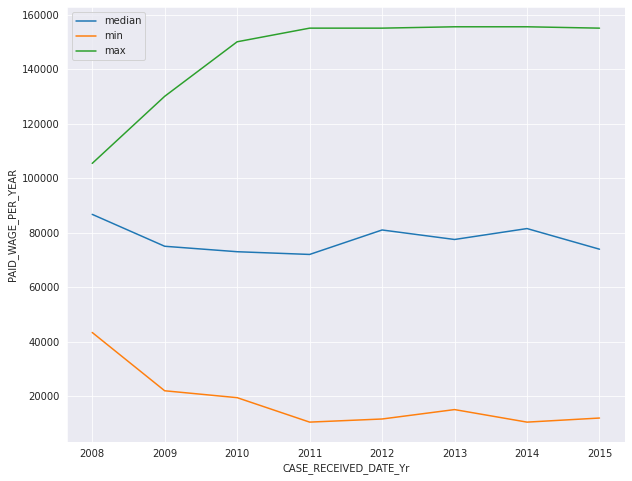

In [13]:
def trend_chart(df2,output_var,date_var,kind="bar", figsize=(8,10)):
  df2=pd.DataFrame()
  df2["median"]=data.groupby(date_var)[output_var].median()
  df2["min"]=data.groupby(date_var)[output_var].min()
  df2["max"]=data.groupby(date_var)[output_var].max()
  df2.plot(kind=kind, figsize=figsize)
  plt.xlabel(date_var)
  plt.ylabel(output_var)
  print("Distribution of ",output_var)
  


trend_chart(data,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="line", figsize=(10,8))

Insights : pending

Testing strength of trend using regression

Summary statistics for Median Income
                                 OLS Regression Results                                
Dep. Variable:      Application_Count   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.359
Method:                 Least Squares   F-statistic:                              5.479
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                      0.0518
Time:                        02:14:43   Log-Likelihood:                         -91.976
No. Observations:                   8   AIC:                                      186.0
Df Residuals:                       7   BIC:                                      186.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Distribution of  PAID_WAGE_PER_YEAR


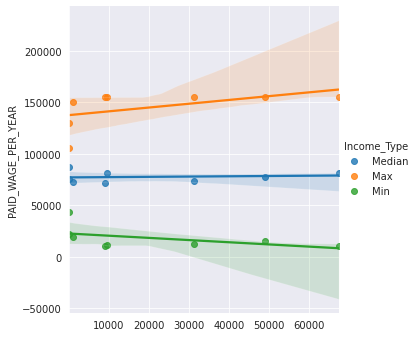

In [79]:
### testing the strength of trend using signficance

import statsmodels.api as sm

def trend_signifcance_test(df2,output_var,date_var,kind="bar", figsize=(8,10)):
  df2=pd.DataFrame()
  df2["Income"]=data.groupby(date_var)[output_var].median()
  df2["Application_Count"]=data.groupby(date_var)[output_var].count()
  df2["Income_Type"]="Median"
  df2=df2.reset_index()
  mod = sm.OLS(df2["Application_Count"], df2["Income"])
  res = mod.fit()
  print("Summary statistics for Median Income")
  print(res.summary())

 
  df3=pd.DataFrame() 
  df3["Income"]=data.groupby(date_var)[output_var].max()
  df3["Application_Count"]=data.groupby(date_var)[output_var].count()
  df3["Income_Type"]="Max"
  df3=df3.reset_index()
  mod = sm.OLS(df3["Application_Count"], df3["Income"])
  res = mod.fit()
  print("Summary statistics for Maximum Income")
  print(res.summary()) 
  print()
  print()

  df4=pd.DataFrame() 
  df4["Income"]=data.groupby(date_var)[output_var].min()
  df4["Application_Count"]=data.groupby(date_var)[output_var].count()
  df4["Income_Type"]="Min"
  df4=df4.reset_index()
  mod = sm.OLS(df4["Application_Count"], df4["Income"])
  res = mod.fit()
  print("Summary statistics for Minimum Income")
  print(res.summary())
  print()
  print() 

  df2=pd.concat([df2,df3,df4],axis=0)


  
  sns.lmplot(x="Application_Count", y="Income", hue="Income_Type", data=df2)
  plt.xlabel("")
  plt.ylabel(output_var)
  print("Distribution of ",output_var)


trend_signifcance_test(data,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="lmplot", figsize=(10,8))

Finding : Median is s up but not significant.
Mininum is decreasing.Max salary is increasing.


Insight : 

Maximum salaries are remaining exactly constant and the Median salaries are slightly going up while mininum salries are decreasing over time.Increased opportunity of people to make more in the future as the salaries has been going up.

And for every category other than data scientists, as time goes on, there might actually be increased risk that you will make less than you expected as minimum salaries are going down.

 ***Distribution of Salaries for different Jobs - How much money can I make in every profession?***

In [62]:
var="JOB_TITLE_SUBGROUP"
features=data[var].unique()
features

array(['software engineer', 'assistant professor', 'teacher',
       'business analyst', 'management consultant', 'data analyst',
       'attorney', 'data scientist'], dtype=object)

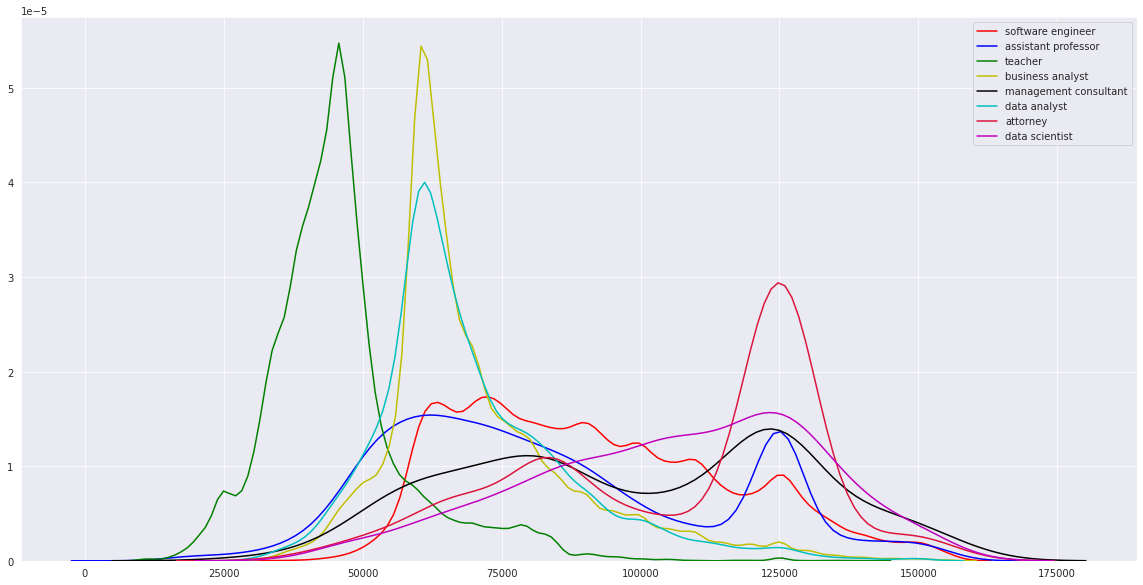

In [61]:
fig = plt.figure(figsize=(20,10),)
color=['r','b','g','y','black','c','crimson','m','lighpink']
col=0
for feature in features: 
  #fig = plt.figure(figsize=(20,10),)
  ax=sns.kdeplot(data[dependent_var][data[var]==feature] , color=color[col],shade=False,label=feature)
  col=col+1


Insights :

1) Teachers are paid less compared to other professionals.Most of them make between 25K-50K.


2) While Business Analyst and Data Analyst make more money than Teachers, they are relatively paid less compared to other professionals.They make between 55K-75K

3) Most of the Software engineers make between 65K-100K

4) Assistant Professor - Bimodal distribution indicating some people are less and some people are paid more.There is a chance that you might make less than expected or make more in the future.

5)Attorneys are highest paid professions with most of them making over 1lakh


# *** - Are the salries going up or down in every profession?***

In [64]:
### plot a trend line to see the trend
features

array(['software engineer', 'assistant professor', 'teacher',
       'business analyst', 'management consultant', 'data analyst',
       'attorney', 'data scientist'], dtype=object)

===============================teacher==============================================
Distribution of  PAID_WAGE_PER_YEAR
Summary statistics for Median Income
                                 OLS Regression Results                                
Dep. Variable:      Application_Count   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.359
Method:                 Least Squares   F-statistic:                              5.479
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                      0.0518
Time:                        02:14:50   Log-Likelihood:                         -91.976
No. Observations:                   8   AIC:                                      186.0
Df Residuals:                       7   BIC:                                      186.0
Df Model:                           1                                                  
Covariance Type:            nonrobust             

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Distribution of  PAID_WAGE_PER_YEAR


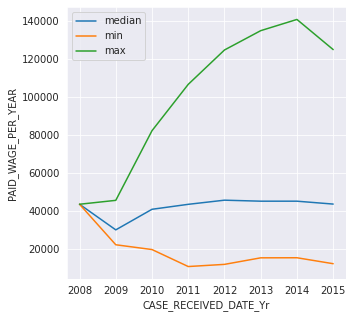

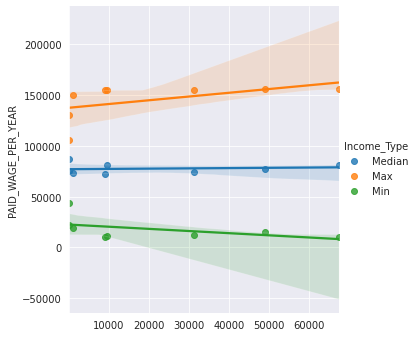

In [80]:

  

### dataframe subsetted to select only 

var="JOB_TITLE_SUBGROUP"
features=data[var].unique()
features


feature="teacher"
data2=data[data[var]==feature]
trend_chart(data2,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="line", figsize=(5,5))
trend_signifcance_test(data2,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="lmplot", figsize=(10,8))



### Insights for Teacher - Increased opportunity for Teachers to make more in the future as their salaries are rising.

===============================business analyst==============================================
Distribution of  PAID_WAGE_PER_YEAR
Summary statistics for Median Income
                                 OLS Regression Results                                
Dep. Variable:      Application_Count   R-squared (uncentered):                   0.439
Model:                            OLS   Adj. R-squared (uncentered):              0.359
Method:                 Least Squares   F-statistic:                              5.479
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                      0.0518
Time:                        02:16:38   Log-Likelihood:                         -91.976
No. Observations:                   8   AIC:                                      186.0
Df Residuals:                       7   BIC:                                      186.0
Df Model:                           1                                                  
Covariance Type:            nonrobust    

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


Distribution of  PAID_WAGE_PER_YEAR


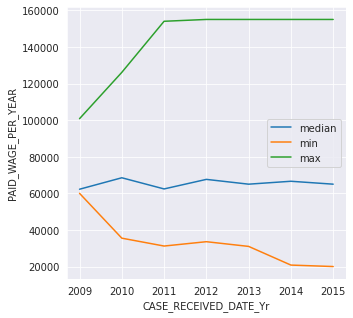

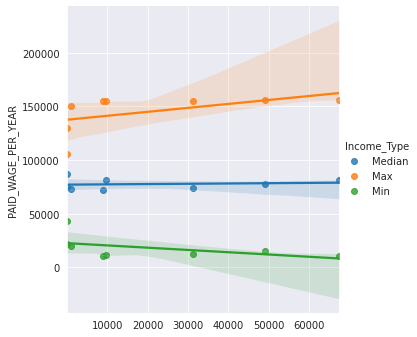

In [81]:

  ### This is for business anlayst

### dataframe subsetted to select only 

var="JOB_TITLE_SUBGROUP"
features=data[var].unique()
features


feature="business analyst"
data2=data[data[var]==feature]
trend_chart(data2,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="line", figsize=(5,5))
trend_signifcance_test(data2,"PAID_WAGE_PER_YEAR","CASE_RECEIVED_DATE_Yr",kind="lmplot", figsize=(10,8))


Insights for Business Anlyst - Increased opportunity for Teachers to make more in the future but increased risk to make less money in future as the salaries are going down.

***Does state of employment has impact on salary**

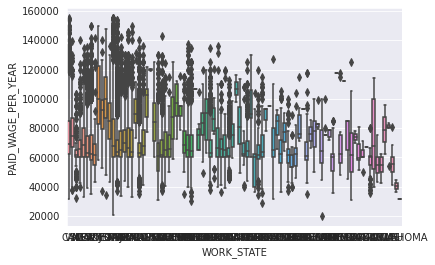

In [87]:
x="WORK_STATE"
feature="business analyst"
data2=data[data[var]==feature]
sns.boxplot(x=x, y=dependent_var,  data=data2)

***Reference articles***
https://www.kaggle.com/randylaosat/hr-analytics-simple-visualizations

https://www.kaggle.com/gsdeepakkumar/visualisation-with-python-hr-data

https://www.kaggle.com/kukreti12/hr-analytics-using-python|

**Functions**************************

In [0]:
sns.set_style("darkgrid")

### line plot to get trend - trend analysis

### 1) Date is represented as individual date.This need aggregation.
## include datecolumn also in the feature_name
def get_line_plot(dataframe,feature_name,date_col):
  ### Date on X-axis / continous var on Y-axis
  data["year"]=dataframe[feature]
  data=d
  

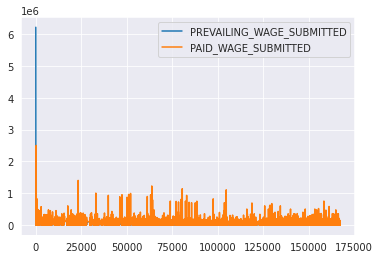

In [0]:
get_line_plot(data,["PREVAILING_WAGE_SUBMITTED","PAID_WAGE_SUBMITTED"])

In [0]:
data.columns

Index(['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE',
       'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE',
       'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR',
       'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order'],
      dtype='object')

**end of functions**

In [0]:
### Functions for plotting and visualization

### This plots bar chart with proportions
def get_bar_plot(dataframe,feature_name):
  
   df=pd.DataFrame(dataframe[feature_name])
   df["Proportion (%)"]=1
   df=df.groupby([feature_name]).agg({"Proportion (%)":"count"}).reset_index()
   df["Proportion (%)"]=df["Proportion (%)"]/df["Proportion (%)"].sum()*100
   sns.barplot(x="Proportion (%)", y=feature_name,data=df)
   title_name="Distribution of " + feature_name 
   plt.title(title_name)
   plt.show()



###############################################################################################################
#### Draw bar and box plot - with Quartiles

from numpy import median
def get_bar_facet_plot(data,var,output_var,chart_type=plt.hist,hue=None,col=None):
  df=pd.DataFrame(data[var])
  df["Proportion (%)"]=1
  df=df.groupby([var]).agg({"Proportion (%)":"count"}).reset_index()
  df["Proportion (%)"]=df["Proportion (%)"]/df["Proportion (%)"].sum()*100
  sns.barplot(x="Proportion (%)", y=var,data=df)
  title_name="Proportion of " + var 
  plt.title(title_name)
  plt.show()

### code to calculate median value
  
  print("Distribution of",output_var ,"based on ",var)
  
  plt.figure(figsize=(16, 16))
  #g = sns.catplot(x=output_var, y=var,
   #             hue=hue, col=col,
    #            data=data, kind="bar",
     #           height=4, aspect=.7);
  
  sns.barplot(x=output_var, y=var, data=data, estimator=median,hue=hue)
  plt.show()

### code to plot based on output value
  plt.figure(figsize=(16, 16))
  g = sns.FacetGrid(data, col=var,palette='Set1')
  g.map(chart_type, output_var,color="r");
  #title_name1="Distribution of Median" +output_variable+ var 
  #plt.title(title_name1)
  print("Distribution of",output_var ,"based on ",var)
  plt.show()   


In [0]:
#### salary data is avaialable in 2020 folder

In [0]:
### Importing data
data=pd.read_csv("/content/salary_data.csv")

In [0]:
data.head()

,Index,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,EXPERIENCE_REQUIRED_NUM_MONTHS,COUNTRY_OF_CITIZENSHIP,PREVAILING_WAGE_SOC_CODE,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,1,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,BLOOMINGTON,NaN,NaN,NaN,NaN,NaN,15-1132,"Software Developers, Applications",IL,NaN,y,H-1B,NaN,62171.0,software engineer,1.0
1,2,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,SAN FRANCISCO,Doctorate,marketing,n,NaN,IRAN,25-1011,"Business Teachers, Postsecondary",CALIFORNIA,94132,NaN,greencard,NaN,91440.0,assistant professor,2.0
2,3,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,25-2052,"Special Education Teachers, Kindergarten and E...",CA,NaN,y,H-1B,NaN,49470.0,teacher,3.0
3,4,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,HARLINGEN CISD,NaN,NaN,NaN,NaN,NaN,25-1042,"Biological Science Teachers, Postsecondary",TX,NaN,y,H-1B,NaN,43800.0,teacher,4.0
4,5,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,PORTLAND,NaN,NaN,NaN,NaN,NaN,15-1133,"Software Developers, Systems Software",OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5.0


In [0]:
data.shape

(167275, 27)

In [0]:
### setting independent variable and dependent variable
dependent_var="PAID_WAGE_PER_YEAR"
independent_var=data.drop(dependent_var,axis=1).columns.to_list()
print((dependent_var))
print(independent_var)



PAID_WAGE_PER_YEAR
['Index', 'CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'PREVAILING_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'order']


In [0]:
### Splitting numerical ,discreate and categorical 

## splitting categorical and numerical variable
categorical_var=[var for var in data.columns if data[var].dtypes=='object']
numerical_var=[var for var in data.columns if data[var].dtypes ==('float64' or 'int64')]
discrete_var=[]
print("Categorical variables are",categorical_var)
print("numerical variables are",numerical_var)
print("discrete variables are",discrete_var)





Categorical variables are ['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE', 'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY', 'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED', 'EXPERIENCE_REQUIRED_Y_N', 'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE', 'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS', 'JOB_TITLE_SUBGROUP']
numerical variables are ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR']
discrete variables are []


In [0]:
### verifiying if there are any columns appearing in both split

print("Checking if there are duplicate columns or not")
print([var for var in numerical_var if var in (categorical_var or discrete_var) ])
print([var for var in discrete_var if var in (categorical_var or numerical_var) ])
print([var for var in categorical_var if var in ( discrete_var or numerical_var) ])

Checking if there are duplicate columns or not
[]
[]
[]


***1)Plan Analysis***

****2) Ask Questions***

***1) Do specific sub-types of data-related jobs have higher or lower salaries than others?***


***2)Do salaries change based on visa type (very important to know if you are not a US citizen)?***

***1) Do specific sub-types of data-related jobs have higher or lower salaries than others?***

In [0]:
var="JOB_TITLE_SUBGROUP"
output_variable=dependent_var
get_bar_facet_plot(data,var,output_variable)

NameError: ignored

***2)Do salaries change based on visa type (very important to know if you are not a US citizen)?***

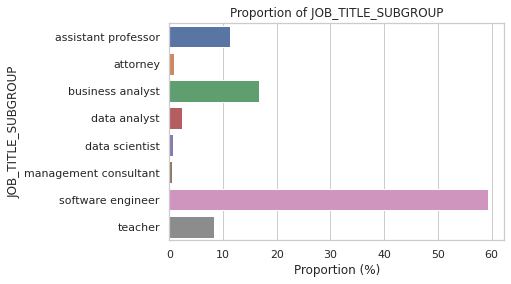

Distribution of PAID_WAGE_PER_YEAR based on  JOB_TITLE_SUBGROUP


ValueError: ignored

<Figure size 1152x1152 with 0 Axes>

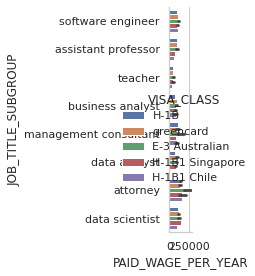

In [0]:
var="JOB_TITLE_SUBGROUP"
output_variable=dependent_var
get_bar_facet_plot(data,var,output_variable,hue="VISA_CLASS")

<Figure size 1152x1152 with 0 Axes>

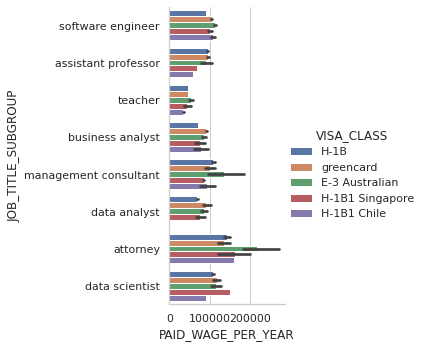

In [0]:
plt.figure(figsize=(16, 16))
sns.set(style="whitegrid")
g = sns.catplot(x=dependent_var, y="JOB_TITLE_SUBGROUP",
                hue="VISA_CLASS",
                data=data, kind="bar")
                